<a href="https://colab.research.google.com/github/hasan-rakibul/AI-cybersec/blob/main/Lab%205/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 5: Preprocessing dataset &ndash; intrusion detection**

Data preprocessing is the process of preparing raw data for analysis by applying various techniques to make the data more useful and meaningful. It involves transforming data into a format that can be easily analyzed by machine learning algorithms.

In this laboratory, we will preprocess the KDD Cup 1999 dataset, which is a widely used dataset for evaluating intrusion detection systems. It contains a sample of network traffic data from the DARPA 1998 Intrusion Detection System Evaluation, which aimed to evaluate the ability of intrusion detection systems to detect various types of network attacks.

The dataset includes network connections, each represented by 41 features. The connections are classified into one of five categories: normal, DoS, probe, R2L (unauthorized access from a remote machine), and U2R (unauthorized access to local superuser privileges).

The 41 features include basic features such as duration, protocol type, and service, as well as more detailed features such as number of failed login attempts, number of root accesses, and number of file creations. Some features are continuous, while others are categorical or binary.

# Load and orgainse the dataset
Download the dataset from [Kaggle](https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?select=kddcup.data_10_percent.gz). Unzip and upload *kddcup.data_10_percent.gz* file into */content* folder of your colab session.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kddcup.data_10_percent.gz")
print(df.columns)
df.head()

Index(['0', 'tcp', 'http', 'SF', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.12', '0.13', '0.14',
       '0.15', '0.16', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', 'normal.'],
      dtype='object')


,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
df = pd.read_csv("kddcup.data_10_percent.gz", header=None)
print(df.columns)
df.head()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
# feature_names found from https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?resource=download&select=kddcup.names
feature_names=['duration', 'protocol_type', 'service',
 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
 'num_access_files', 'num_outbound_cmds', 'is_host_login',
 'is_guest_login', 'count', 'srv_count', 'serror_rate',
 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
 'dst_host_srv_count', 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate', 'target']

In [5]:
# Load the dataset
df = pd.read_csv("kddcup.data_10_percent.gz", names=feature_names)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [8]:
# attack_types found from https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?resource=download&select=training_attack_types
# dot (.) added with each type to match the dataset
attack_types = {
    'normal.': 'normal',
    'back.': 'dos',
    'buffer_overflow.': 'u2r',
    'ftp_write.': 'r2l',
    'guess_passwd.': 'r2l',
    'imap.': 'r2l',
    'ipsweep.': 'probe',
    'land.': 'dos',
    'loadmodule.': 'u2r',
    'multihop.': 'r2l',
    'neptune.': 'dos',
    'nmap.': 'probe',
    'perl.': 'u2r',
    'phf.': 'r2l',
    'pod.': 'dos',
    'portsweep.': 'probe',
    'rootkit.': 'u2r',
    'satan.': 'probe',
    'smurf.': 'dos',
    'spy.': 'r2l',
    'teardrop.': 'dos',
    'warezclient.': 'r2l',
    'warezmaster.': 'r2l',
}

In [9]:
# adding attack_type column
df['attack_type'] = df["target"].map(attack_types)

In [10]:
df.iloc[7600:7605, -2:]

,target,attack_type
7600,normal.,normal
7601,neptune.,dos
7602,neptune.,dos
7603,normal.,normal
7604,normal.,normal


In [11]:
df.drop(['target'], axis=1, inplace=True)

In [12]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [13]:
df['attack_type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: attack_type, dtype: int64

<Axes: >

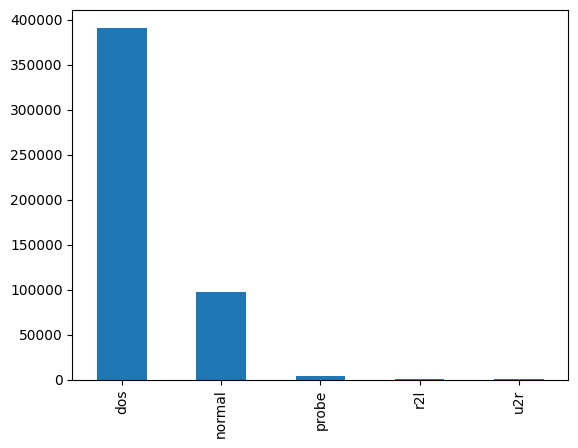

In [14]:
# Visualisation
df['attack_type'].value_counts().plot(kind="bar")

<Axes: xlabel='Protocol types', ylabel='frequency'>

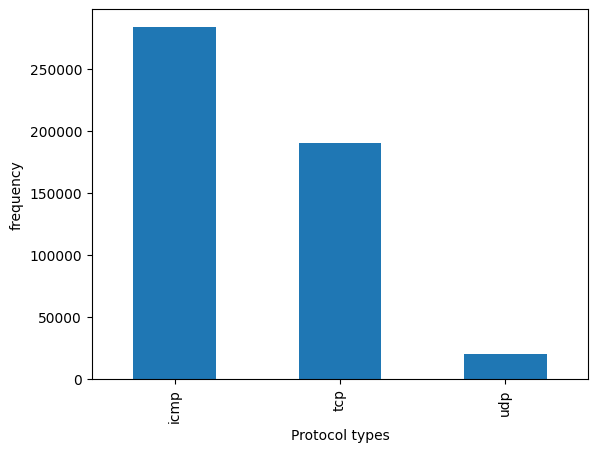

In [15]:
df['protocol_type'].value_counts().plot(kind="bar", xlabel="Protocol types", ylabel="frequency")

# Removing NA values and constant features

In [16]:
df.isna().any().any() # checking NA values

False

In [17]:
df.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [18]:
# df.dropna(...)
# df.fillna(...)

In [19]:
keep_col = []
for col in df:
    if df[col].nunique()>1:
      keep_col.append(col)

In [20]:
df = df[keep_col] # keep columns where there are more than 1 unique values

In [21]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


# Removing highly-correlated features

<Axes: >

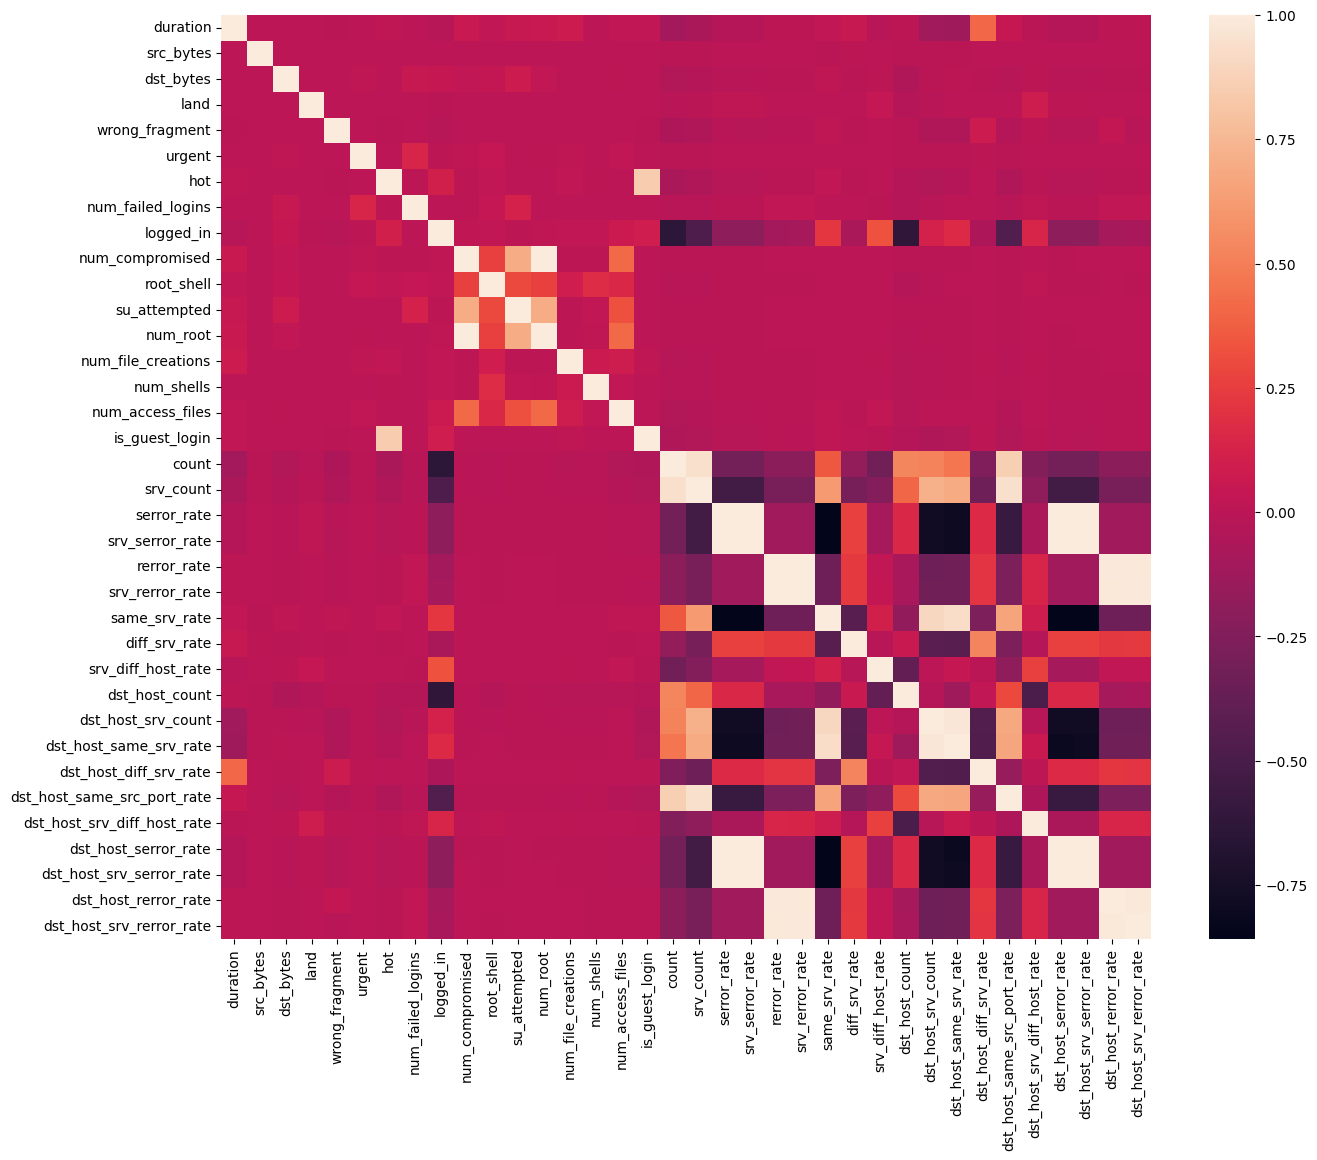

In [22]:
corr = df.corr(numeric_only=True) # Pearson correlation coefficient between the columns
plt.figure(figsize=(15, 12)) # creates a new figure with a specified size of 15 inches by 12 inches.
sns.heatmap(corr) # creates a heatmap of the correlation matrix using seaborn

In [23]:
df.corr(numeric_only=True).unstack().sort_values(ascending=False)

duration                  duration                1.000000
root_shell                root_shell              1.000000
is_guest_login            is_guest_login          1.000000
num_access_files          num_access_files        1.000000
num_shells                num_shells              1.000000
                                                    ...   
dst_host_srv_serror_rate  same_srv_rate          -0.857544
same_srv_rate             dst_host_serror_rate   -0.857835
dst_host_serror_rate      same_srv_rate          -0.857835
same_srv_rate             serror_rate            -0.858247
serror_rate               same_srv_rate          -0.858247
Length: 1296, dtype: float64

In [24]:
# num_root is highly correlated with num_compromised and should be ignored for analysis.
df.drop('num_root', axis = 1, inplace = True) # axis=1 specifies that we want to drop the columns axis

# srv_serror_rate is highly correlated with serror_rate and should be ignored for analysis.
df.drop('srv_serror_rate', axis = 1, inplace = True)

# srv_rerror_rate is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('srv_rerror_rate', axis = 1, inplace=True)

# dst_host_srv_serror_rate is highly correlated with srv_serror_rate and should be ignored for analysis.
df.drop('dst_host_srv_serror_rate', axis = 1, inplace=True)

# dst_host_serror_rate is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_serror_rate', axis = 1, inplace=True)

# dst_host_rerror_rate is highly correlated with srv_rerror_rate and should be ignored for analysis.
df.drop('dst_host_rerror_rate', axis = 1, inplace=True)

# dst_host_srv_rerror_rate is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace=True)

# dst_host_same_srv_rate is highly correlated with dst_host_srv_count and should be ignored for analysis.
df.drop('dst_host_same_srv_rate', axis = 1, inplace=True)

# srv_count is highly correlated with count and should be ignored for analysis.
df.drop('srv_count', axis = 1, inplace=True)

<Axes: >

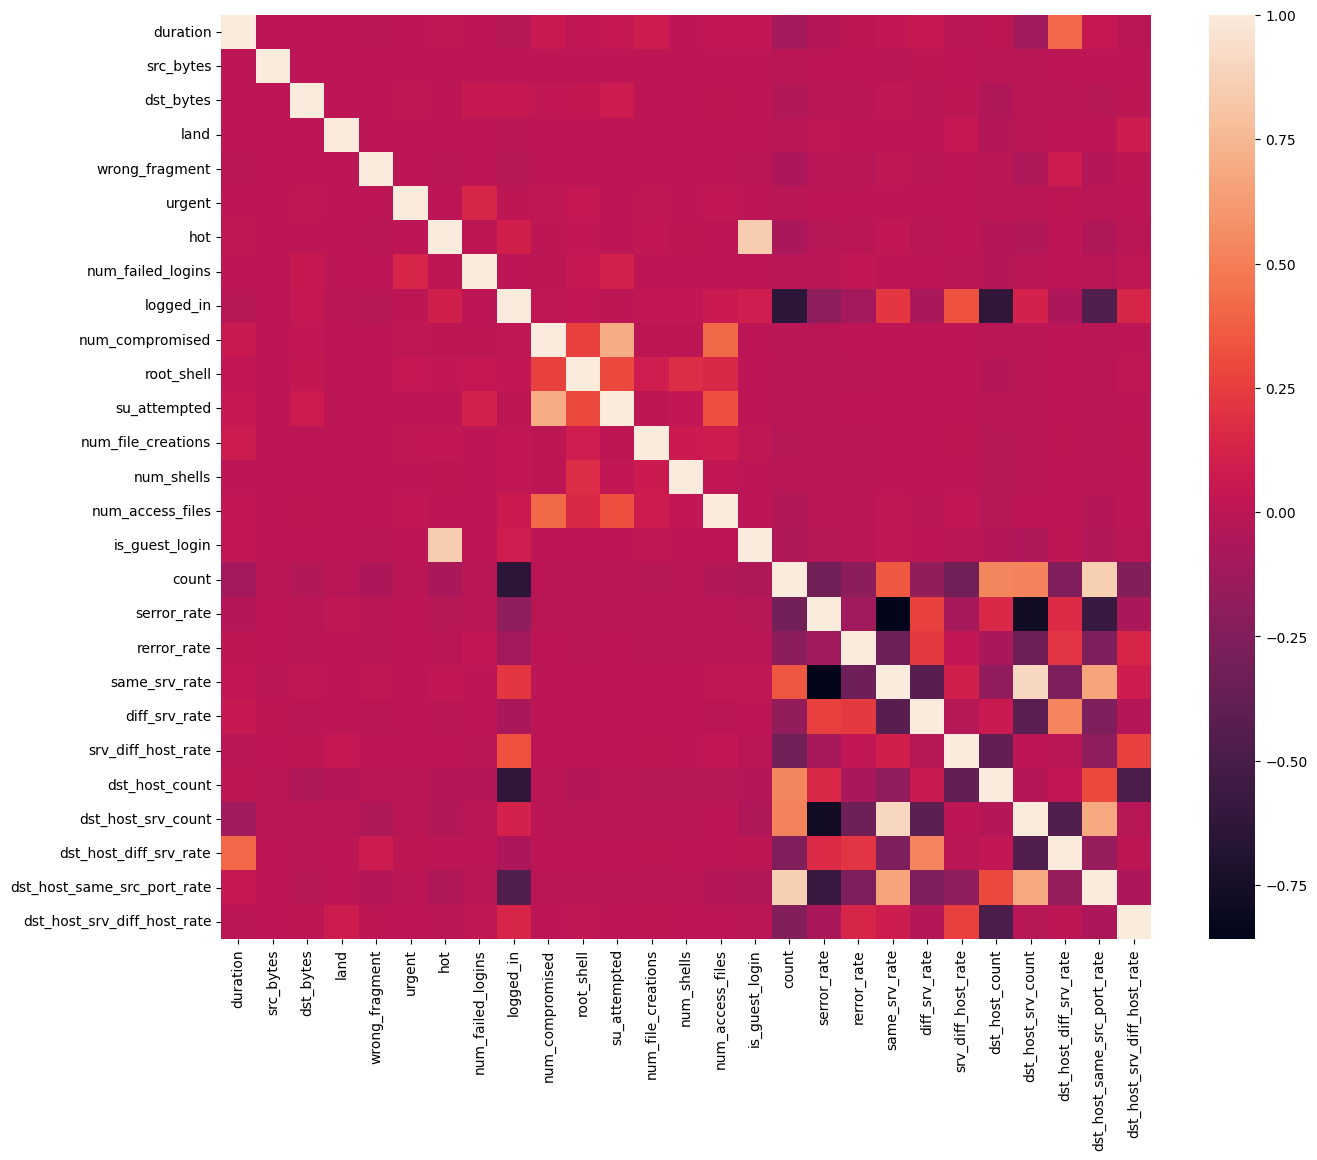

In [25]:
corr = df.corr(numeric_only=True) # Pearson correlation coefficient between the columns
plt.figure(figsize=(15, 12)) # creates a new figure with a specified size of 15 inches by 12 inches.
sns.heatmap(corr) # creates a heatmap of the correlation matrix using seaborn

In [26]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


# Label encoding the features

In [27]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [28]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [29]:
pmap = {"icmp":0, "tcp":1, "udp":2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [30]:
df['protocol_type'].value_counts()

0    283602
1    190065
2     20354
Name: protocol_type, dtype: int64

In [31]:
#flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5 , 'S1':6 , 'S2':7, 'RSTOS0':8, 'S3':9 , 'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [32]:
#attack type feature mapping
amap = {'dos':0, 'normal':1, 'probe':2, 'r2l':3, 'u2r':4}
df['attack_type'] = df['attack_type'].map(amap)

In [33]:
df["service"].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [34]:
df.drop('service', axis = 1, inplace= True)

In [35]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count       

# Scaling

In [36]:
df.describe()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack_type
count,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,0.467132,0.297730,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,...,0.057433,0.791547,0.020982,0.028997,232.470778,188.665670,0.030906,0.601935,0.006684,0.220796
std,707.746472,0.575606,0.597424,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,...,0.231623,0.388189,0.082205,0.142397,64.745380,106.040437,0.109259,0.481309,0.042133,0.451233
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.040000,1.000000,0.000000,0.000000
max,58329.000000,2.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
y = df[['attack_type']]
X = df.drop(['attack_type'], axis=1)

In [39]:
y.head()

,attack_type
0,1
1,1
2,1
3,1
4,1


In [40]:
X.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0
1,0,1,0,239,486,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0


In [41]:
scaler = MinMaxScaler() # MinMaxScaler scales the data to a fixed range (by default, between 0 and 1) by subtracting the minimum value and dividing by the range of the data.
X = scaler.fit_transform(X)

In [42]:
X

array([[0.  , 0.5 , 0.  , ..., 0.  , 0.11, 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.03, 0.  ],
       ...,
       [0.  , 0.5 , 0.  , ..., 0.  , 0.06, 0.05],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.04, 0.05],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.17, 0.05]])

# Train-test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(330994, 29) (163027, 29)
(330994, 1) (163027, 1)


In [45]:
X_train.shape[1]

29

NB: Parts of this program is taken and improved from https://www.kaggle.com/code/iamyajat/intrusion-detection-system-using-neural-networks, which has been released under the Apache 2.0 open source license

# Practice task
Visulalise at least 10 features of the KDD Cup dataset using different types of plots (such as bar, histogram, line, etc.).